In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
path = '/content/drive/MyDrive/winter_AI_EDA/COVID-19 Coronavirus.csv'

In [53]:
covid_df = pd.read_csv(path)

In [54]:
covid_df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [55]:
covid_df.rename(columns={
    covid_df.columns[0]: 'Country',
    covid_df.columns[1]: 'Other names',
    covid_df.columns[2]: 'ISO',
    covid_df.columns[3]: 'Population',
    covid_df.columns[4]: 'Continent',
    covid_df.columns[5]: 'Total Cases',
    covid_df.columns[6]: 'Total Deaths',
    covid_df.columns[7]: 'TC1Mpop',
    covid_df.columns[8]: 'TD1Mpop',
    covid_df.columns[9]: 'Death percentage'
}, inplace=True)

In [56]:
covid_df.head()

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [58]:
covid_df['Population']=covid_df['Population'].map(int)
covid_df['Total Cases']=covid_df['Total Cases'].map(int)
covid_df['Total Deaths']=covid_df['Total Deaths'].map(int)
covid_df['TC1Mpop']=covid_df['TC1Mpop'].map(int)
covid_df['TD1Mpop']=covid_df['TD1Mpop'].map(int)
covid_df['Death percentage']=covid_df['Death percentage'].map(float)

In [39]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 1 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  224 non-null    object 
 1   Other names              223 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  224 non-null    object 
 3   Population               224 non-null    int64  
 4   Continent                224 non-null    object 
 5   Total Cases              224 non-null    int64  
 6   Total Deaths             224 non-null    int64  
 7   Tot Cases//1M pop        224 non-null    int64  
 8   Tot Deaths/1M pop        224 non-null    int64  
 9   Death percentage         224 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.6+ KB


In [59]:
covid_df=covid_df.drop(['Other names','ISO'],axis=1)

In [60]:
covid_df.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [61]:
covid_df.isnull().sum()

,0
Country,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
TC1Mpop,0
TD1Mpop,0
Death percentage,0


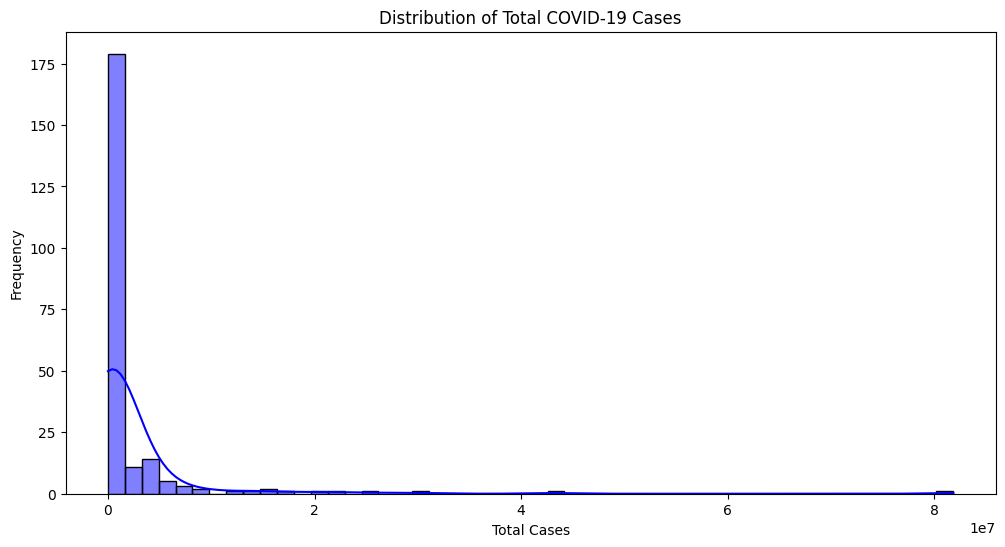

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(covid_df['Total Cases'], bins=50, kde=True, color='blue')
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()


<ipython-input-63-de64686a447b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Cases', y='Country', data=top_cases, palette='viridis')


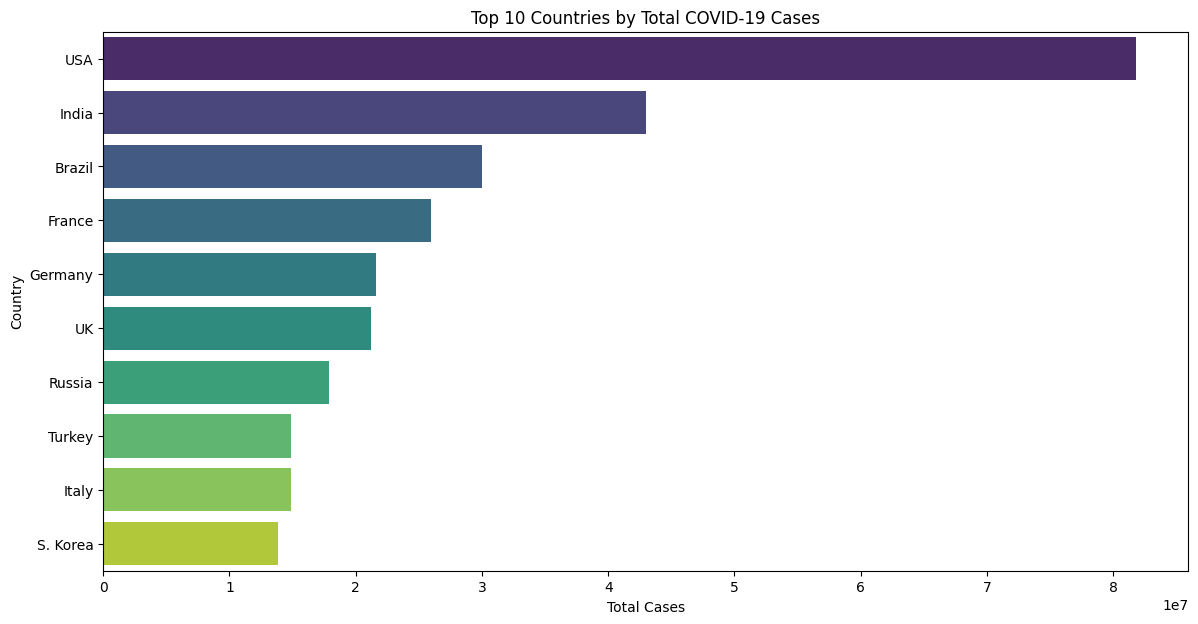

In [63]:
top_cases = covid_df.sort_values(by='Total Cases', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Cases', y='Country', data=top_cases, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

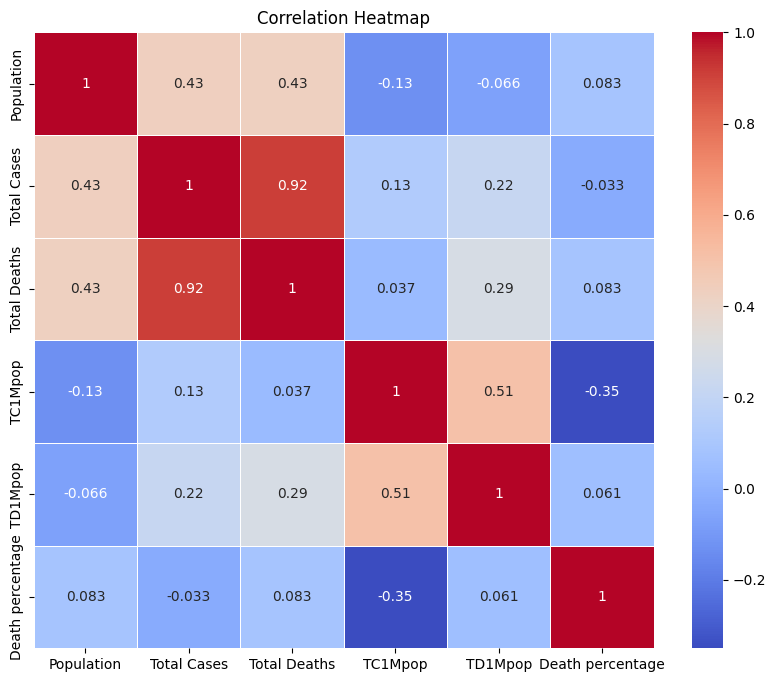

In [65]:
numeric_df = covid_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()  # Calculate correlation on numeric data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()